<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="main pic.jpeg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                  <b> Team 5 <br> Chatbot Based Song Recommendation System   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Contents

1. **[Problem Statement](#problem)**

2. **[Importing the Libraries](#import_lib)**

3. **[Reading the datasets](#read_data)**

4. **[Data Preprocessing](#data_prep)**

    - 4.1 - [Artist Dataset](#art_data)
        - 4.1.1 - [Data Dictionary of Artist Dataset](#dict_art)
        - 4.1.2 - [Exploratory Data Analysis](#eda_art)
            - 4.1.2.1 - [Data Dimensions, Data Types, Missing Values, Summary Statistics](#dd_art)
              
    - 4.2 - [Tags Dataset](#tag_data)
        - 4.2.1 - [Data Dictionary of Tag Dataset](#dict_tag)
        - 4.2.2 - [Exploratory Data Analysis](#eda_tag)
             - 4.2.2.1 - [Data Dimensions, Data Types, Missing Values, Summary Statistics](#dd_tag)
              
    - 4.3 - [User-Artists Dataset](#ua_data)
        - 4.3.1 - [Data Dictionary of Artist Dataset](#dict_ua)
        - 4.3.2 - [Exploratory Data Analysis](#eda_ua)
             - 4.3.2.1 - [Data Dimensions, Data Types, Missing Values, Summary Statistics](#dd_ua)
              
     - 4.4 - [User taggedartists Dataset](#ut_data)
        - 4.4.1 - [Data Dictionary of Artist Dataset](#dict_ut)
        - 4.4.2 - [Exploratory Data Analysis](#eda_ut)
             - 4.4.2.1 - [Data Dimensions, Data Types, Missing Values, Summary Statistics](#dd_ut)
              
5. **[Correlation](#corr)**

6. **[Recommendation System](#rec)**

    - 6.1 - [Popularity Recommendation System](#pop)
        - 6.1.1 - [Top artists based on number of times the their song was played](#not)
        - 6.1.2 - [Top artists based on the number of users](#nou)
        
    - 6.2 - [Mood-Text Classifier](#mt)
        - 6.2.1 - [Importing the required Libraries and text file for mood-text classifier](#import_lib1)
        - 6.2.2 - [Train-Test Split of the data](#tt)
        
    - 6.3 - [Collabrative Filtering Recommendation System](#collab)
        - 6.3.1 - [User-Used Based Collabrative Filtering Recommendation System](#uu)
        - 6.3.2 - [Item-Item based Collabrative Filtering Recommendation System](#ii)
        
    - 6.4 - [Mood-Based Recommendation System](#mood)
        
    - 6.5 - [Content Based Recommendation System](#cont)
     
    - 6.6 - [Hybrid Recommendation System.](#hyb)
        - 6.6.1 - [Focus-Based Hybrid Recommendation system](#foc)
    


<table align="left">
    <tr>
        <td width="20%">
            <img src="head.jpeg">
        </td>
        <td>
            <div align="center", style="font-size:250%">
                <font color="#21618C">
                    <b>Problem Statement.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='problem'></a>


In today’s era internet is expanding rapidly and as a result, the data, as well as other importation which we want to show to a particular user, becomes difficult for the techs to recommend to their users. So here the concept of Recommendation Systems comes into picture . 


**Our GOAL**  is to predict which songs that a user will listen to and make a recommendation to each user depending on the popularity,content, the mood, behaviour and hybrid of all these.


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Importing the Libraries.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='import_lib'></a>

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy import sparse

from surprise import Dataset, Reader
import heapq
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans,SVDpp
from surprise import accuracy
import surprise

<table align="left">
    <tr>
        <td width="20%">
            <img src="head.jpeg">
        </td>
        <td>
            <div align="center", style="font-size:300%">
                <font color="#21618C">
                    <b>Data Preprocessing<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='data_prep'></a>


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Reading the datasets<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='read_data'></a>

## Artists Dataset <a id='art_data'></a>

In [2]:
artists = pd.read_csv('artists.dat',sep = '\t')
artists.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [3]:
artists = artists[['id','name']]
artists.head()

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [4]:
artists.rename(columns={'id': 'artistID'},
          inplace=True, errors='raise')
artists.head()

,artistID,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dictionary of Artist Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dict_art'></a>






1. **artistID**  Represents the unique id of the artist
2. **name**      Represents the name of the artist


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='eda_art'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Missing Values, Summary Statistics  for Artists Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_art'></a>



In [5]:
artists.shape

(17632, 2)

##### There are 17632 artists in the artist dataset 

In [6]:
artists.dtypes

artistID     int64
name        object
dtype: object

In [7]:
artists.isnull().sum()

artistID    0
name        0
dtype: int64

In [8]:
artists.describe(include = np.object)

,name
count,17632
unique,17632
top,The National Bank
freq,1


## Tags Dataset <a id='tag_data'></a>

In [9]:
tags = pd.read_csv('tags.dat', sep ='\t',encoding = 'latin-1')
tags.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


 <table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dictionary for Tags Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dict_tag'></a>



1. **tagID**  Represents the unique id of the genre
2. **tagValue**      Represents the name of the genre


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table> <a id='eda_tag'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Missing Values, Summary Statistics  for Tags Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_tag'></a>


In [10]:
tags.shape

(11946, 2)

##### There are 11946 genres in the tags dataset 

In [11]:
tags.dtypes

tagID        int64
tagValue    object
dtype: object

In [12]:
tags.isnull().sum()

tagID       0
tagValue    0
dtype: int64

In [13]:
tags.describe(include = np.object)

,tagValue
count,11946
unique,11946
top,country: new zealand
freq,1


## User-Artists Dataset <a id='ua_data'></a>

In [14]:
user_artists = pd.read_csv('user_artists.dat',sep = '\t')
user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dictionary for User-Artists Dataset <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dict_ua'></a>


1. **userID**  Represents the unique id of the user
2. **artistID**      Represents the unique id of the artist
3. **weight**      Represents the number of times the songs of the artist was played by the user 


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='eda_ua'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Missing Values, Summary Statistics  for User-Artists Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_ua'></a>


In [15]:
user_artists.shape

(92834, 3)

##### There are 92834 records in User-Artists Dataset

In [16]:
user_artists.dtypes

userID      int64
artistID    int64
weight      int64
dtype: object

In [17]:
user_artists.isnull().sum()

userID      0
artistID    0
weight      0
dtype: int64

In [18]:
user_artists = user_artists.drop_duplicates(keep = 'first')
user_artists.shape

(92834, 3)

In [19]:
user_artists['weight'].describe()

count     92834.00000
mean        745.24393
std        3751.32208
min           1.00000
25%         107.00000
50%         260.00000
75%         614.00000
max      352698.00000
Name: weight, dtype: float64

## User taggedartists Dataset<a id='ut_data'></a>

In [20]:
user_tags = pd.read_csv('user_taggedartists.dat',sep = '\t')
user_tags.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [21]:
user_tags = user_tags.drop(['day','month'],axis =1)
user_tags.head()

,userID,artistID,tagID,year
0,2,52,13,2009
1,2,52,15,2009
2,2,52,18,2009
3,2,52,21,2009
4,2,52,41,2009


<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Data Dictionary for User taggedartists Dataset <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dict_ut'></a>


1. **userID**  Represents the unique id of the user
2. **artistID**      Represents the unique id of the artist
1. **tagID**  Represents the unique id of the genre
2. **year**      Represents the year the song was played 


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='eda_ut'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:145%">
                <font color="#21618C">
                    <b>Data Dimensions, Data Types, Missing Values, Summary Statistics  for User taggedartists Dataset<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='dd_ut'></a>


In [22]:
user_tags.shape

(186479, 4)

##### There are 186479 records in User taggedartists Dataset

In [23]:
user_tags.dtypes

userID      int64
artistID    int64
tagID       int64
year        int64
dtype: object

In [24]:
user_tags.isnull().sum()

userID      0
artistID    0
tagID       0
year        0
dtype: int64

In [25]:
user_tags['year'].value_counts()

2010    54998
2009    43366
2008    40273
2007    20415
2011    15125
2006     9814
2005     2483
1956        3
1979        1
1957        1
Name: year, dtype: int64

In [26]:
user_tags = user_tags[user_tags['year'] > 2000]
user_tags.shape

(186474, 4)

In [27]:
user_tags = user_tags.drop_duplicates(keep = 'first')
user_tags.shape

(186474, 4)

### Plot showing the number of times the song was played in the following year 

Text(0, 0.5, 'year')

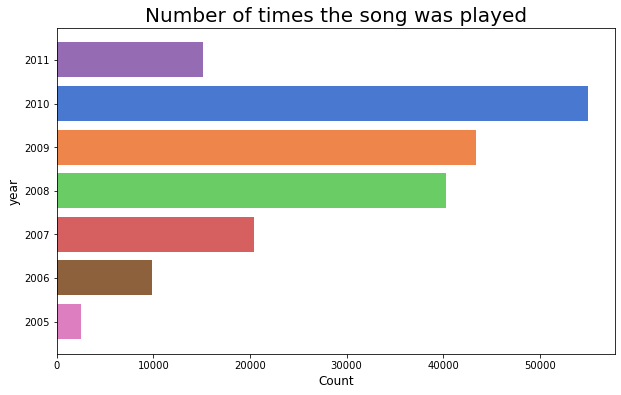

In [28]:
yearly_tagged = user_tags['year'].value_counts()
index = yearly_tagged.index
values = yearly_tagged.values

plt.figure(figsize = (10,6))
plt.barh(index,values, color = sns.color_palette('muted',40))
plt.title('Number of times the song was played',fontsize=20)
plt.xlabel('Count',fontsize=12)
plt.ylabel('year',fontsize=12)

In [29]:
ua_merge = user_artists.merge(artists , on = 'artistID')
ua_merge.head()

,userID,artistID,weight,name
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran



<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Correlation <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='corr'></a>


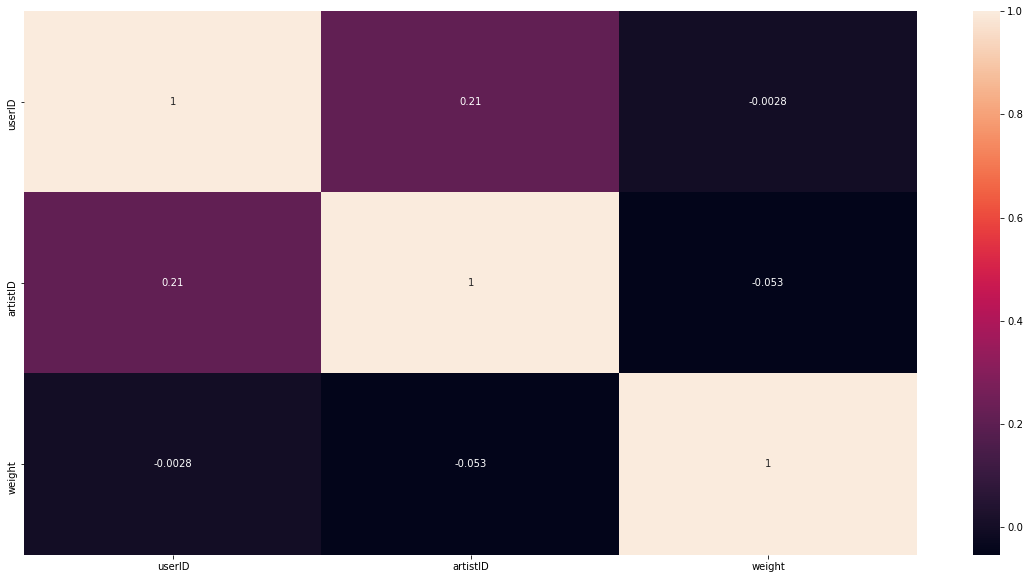

In [30]:

plt.figure(figsize = (20,10))
sns.heatmap(ua_merge.corr() ,annot =True)

<table align="left">
    <tr>
        <td width="20%">
            <img src="head.jpeg">
        </td>
        <td>
            <div align="center", style="font-size:300%">
                <font color="#21618C">
                    <b>Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='rec'></a>


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Popularity Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='pop'></a>

In [31]:
ua_mergeitem = ua_merge.copy(deep=True)

 
<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Top artists based on number of times the their song was played.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='not'></a>

In [32]:
def nooftimesplayed(x):
  
  g_weightbyartist = x.weight.groupby(ua_merge['artistID'])
  s_weightbyartist = g_weightbyartist.sum()
  s1 = s_weightbyartist.sort_values(ascending=False).head(10)
  s1_id = s1.index
  s1_value = s1.values
  top_artists = pd.DataFrame([])
  top_artists['Name']= np.where(artists['artistID'].isin(s1_id), artists['name'],'other' )
  top_artists = top_artists[top_artists['Name'] != 'other'] 
  top_artists['Played_Counts'] = s1_value 
  top_artists = top_artists.reset_index(drop =True)
  top_artists['Rank'] = top_artists['Played_Counts'].rank(method = 'max' ,ascending =False)
  return top_artists

print('The Top artists are')
nop = nooftimesplayed(ua_merge)
nop

The Top artists are


,Name,Played_Counts,Rank
0,Madonna,2393140,1.0
1,Depeche Mode,1301308,2.0
2,Lady Gaga,1291387,3.0
3,The Beatles,1058405,4.0
4,Rihanna,963449,5.0
5,Britney Spears,921198,6.0
6,Christina Aguilera,905423,7.0
7,Katy Perry,688529,8.0
8,Paramore,662116,9.0
9,Shakira,532545,10.0


### Plot showing top artists based on number of times thier songs were played

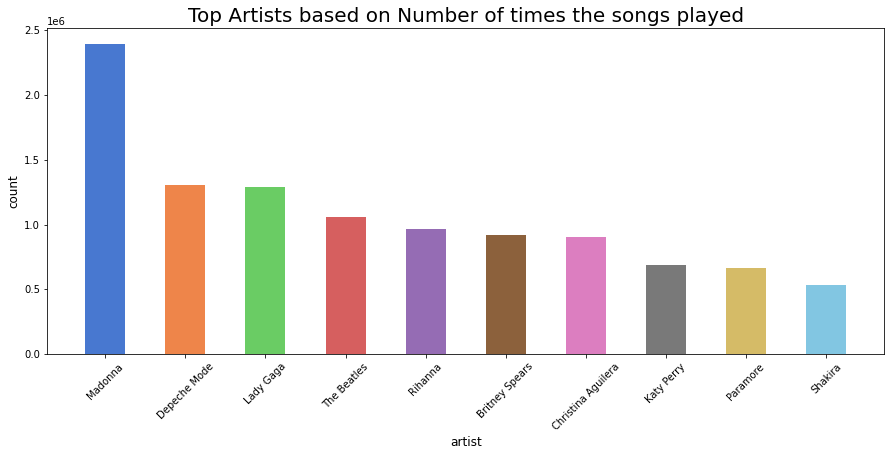

In [33]:
plt.figure(figsize = (15,6))
plt.bar(nop['Name'], nop['Played_Counts'],color = sns.color_palette('muted',40) , width = 0.5)
plt.xticks(rotation = 45)
plt.title('Top Artists based on Number of times the songs played', fontsize = 20)
plt.xlabel('artist',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.show()

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Top artists based on the number of users<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='nou'></a>

In [34]:
def noofusers(x):

   g_listenerbyartist = x.userID.groupby(x['artistID'])
   s_listenerbyartist = g_listenerbyartist.count()
   s2 = s_listenerbyartist.sort_values(ascending=False).head(10)
   s2_id = s2.index
   s2_value = s2.values
   top_artists1 = pd.DataFrame([])
   top_artists1['Name']= np.where(artists['artistID'].isin(s2_id), artists['name'],'other' )
   top_artists1 = top_artists1[top_artists1['Name'] != 'other']
   top_artists1['No_of_Users'] = s2_value 
   top_artists1['Rank'] = top_artists1['No_of_Users'].rank(method = 'max' ,ascending =False)
   return top_artists1

print('The top artist in terms of listeners')
nou = noofusers(ua_merge)
nou

The top artist in terms of listeners


,Name,No_of_Users,Rank
61,Madonna,611,1.0
83,Lady Gaga,522,2.0
184,Muse,484,3.0
221,The Beatles,480,4.0
282,Rihanna,473,5.0
283,Britney Spears,429,6.0
286,Christina Aguilera,417,7.0
294,Katy Perry,407,8.0
327,Avril Lavigne,400,9.0
492,Paramore,399,10.0


### Plot showing top artists based on number of users

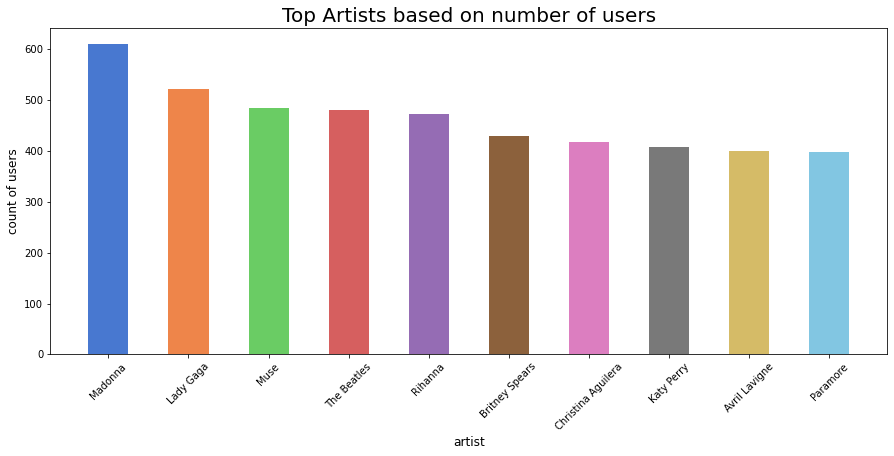

In [35]:
plt.figure(figsize = (15,6))
plt.bar(nou['Name'], nou['No_of_Users'], color=sns.color_palette('muted',40) ,width= 0.5)
plt.xticks(rotation = 45)
plt.title('Top Artists based on number of users', fontsize = 20)
plt.xlabel('artist',fontsize=12)
plt.ylabel('count of users',fontsize=12)
plt.show()


<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Mood-Text Classifier<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='mt'></a>

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:130%">
                <font color="#21618C">
                    <b>Importing the required Libraries and text file for mood-text classifier<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='import_lib1'></a>

In [36]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pickle

In [37]:
data = pd.read_csv('text.csv').drop('Unnamed: 0',axis=1)
data.head()

,text,label
0,I don’t want it,0
1,"So, depressed",0
2,Cannot wait anymore,0
3,Leave me alone,0
4,Had a worst day,0


In [38]:
print('Happy: 1 \U0001f600')
print ( 'Sad:0 \N{pensive face}' )  


Happy: 1 😀
Sad:0 😔


In [39]:
data = shuffle(data)
data.tail()

,text,label
67,he is far from happy at his job,1
45,I dislike things that you make,0
78,Go and enjoy yourself,1
52,The rich are not always joyful,1
39,I feel unknowing,0


In [40]:
data.shape

(100, 2)

In [41]:
target = data['label']
target.head()

98    1
62    1
82    1
20    0
59    1
Name: label, dtype: int64

<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Train-Test Split of the data <br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='tt'></a>

In [42]:
x_train , x_test, y_train , y_test = train_test_split(data.drop('label' , axis =1) , target , test_size = 0.2 ,random_state = 10)

In [43]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range = (1,2))
tfmatrix= tfidf.fit_transform(x_train['text'])
tfmatrix.shape

(80, 265)

In [44]:
svd = TruncatedSVD(n_components=6)
tfmatrix = svd.fit_transform(tfmatrix)

In [45]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
rf = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = rf , 
                       param_grid = tuned_paramaters, 
                       cv = 3,
                       scoring = 'accuracy')
rf_grid.fit(tfmatrix,y_train)

print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'n_estimators': 70}
0.9249762583095915


In [46]:
clf = RandomForestClassifier(random_state = 10 , criterion = 'entropy' , max_depth = 10 , max_leaf_nodes= 11,n_estimators= 50)
clf.fit(tfmatrix , y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=11,
                       n_estimators=50, random_state=10)

In [47]:
x_test['text'].head(5)

21                              Cannot bear you anymore
55    My friend is very joyful about the future of t...
42                  Don’t play with my feelings anymore
53    He looked at Natasha as she sang, and somethin...
90               we really enjoyed your company tonight
Name: text, dtype: object

In [48]:
tfmatrixtest = tfidf.transform(x_test['text'])
tfmatrixtest = svd.transform(tfmatrixtest)

In [49]:
pred = clf.predict(tfmatrixtest)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [50]:
sen = tfidf.transform(x_test['text'][4:5])
sen = svd.transform(sen)
o = clf.predict(sen)
o

array([1], dtype=int64)

<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Collabrative Filtering Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='collab'></a>


<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>User-Used Based Collabrative Filtering Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='uu'></a>



In [51]:
ua_merge.head()

,userID,artistID,weight,name
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran


In [52]:
reader = Reader(rating_scale=(1,352698))
data = Dataset.load_from_df(ua_merge[["userID", "name", "weight"]], reader)
trainset = data.build_full_trainset()

In [53]:
# Tuning the Model
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    'k':[100,500,1000]
}
param_grid = {"sim_options": sim_options}

gs = surprise.model_selection.search.GridSearchCV(KNNWithMeans, param_grid, measures=["rmse"], cv=3)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [54]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

3728.101920772973
{'sim_options': {'name': 'cosine', 'min_support': 3, 'k': 100, 'user_based': True}}


In [55]:
sim_options = {
    "name": "cosine",
    "user_based": True, 
    'min_support':3,
    'k': 100
}
algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [56]:
def coluser_reco(userid , weight):
    
    items = ua_merge['name'].unique()
    test = [[userid, iid, weight] for iid in items]
    predictions = algo.test(test)
    pred = pd.DataFrame(predictions)
    pred = pred.sort_values(by='est', ascending=False).drop('details',axis=1).reset_index(drop=True)
    return pred

ucf = coluser_reco(2,11690)
ucf.head(10)


,uid,iid,r_ui,est
0,2,Viking Quest,11690,36668.360000
1,2,Thalía,11690,27919.174454
2,2,Michel Teló,11690,20399.400000
3,2,X-Ray Dog,11690,13263.880000
4,2,80kidz,11690,12580.960000
5,2,Tangerine Dream,11690,11644.511616
6,2,Ajda Pekkan,11690,10951.440000
7,2,Holdcut,11690,10861.960000
8,2,Άννα Βισση,11690,10478.460000
9,2,Duran Duran,11690,10369.409696




<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Item-Item based Collabrative Filtering Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='ii'></a>

In [57]:
ua_mergeitem.head()

,userID,artistID,weight,name
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran


In [58]:
ua_mergeitem['weight'].describe()

count     92834.00000
mean        745.24393
std        3751.32208
min           1.00000
25%         107.00000
50%         260.00000
75%         614.00000
max      352698.00000
Name: weight, dtype: float64

In [59]:
ua_pivot = ua_mergeitem.pivot(index = 'userID',columns='name', values = 'weight').fillna(0)
ua_pivot.head()

name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,...,티아라,현아,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ,ｂｏｏｇｉｅｍａｎ,ｂｏｒｎ,ｍａｃｈｉｎｅ
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
scaler1 = MinMaxScaler()
ua_pivot1 = pd.DataFrame(scaler1.fit_transform(ua_pivot)).T
ua_sparse = sparse.csr_matrix(ua_pivot1.values)
corrmatrix = pd.DataFrame(cosine_similarity(ua_sparse),index=ua_pivot.columns,columns=ua_pivot.columns)
corrmatrix.head()

name,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,...,티아라,현아,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ,ｂｏｏｇｉｅｍａｎ,ｂｏｒｎ,ｍａｃｈｉｎｅ
name,,,,,,,,,,,,,,,,,,,,,
!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#2 Orchestra,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
def get_similar(artist_name,weight):
    similar_score = corrmatrix[artist_name]*(weight-745)
    similar_score = similar_score.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_score

In [62]:
kl = [('Duran Duran',13883),('Peste Noire',100),('Mortifera',600)]
similar_scores = pd.DataFrame()
for artist,weight in kl:
    similar_scores = similar_scores.append(get_similar(artist,weight),ignore_index = True)

In [63]:
similar_scores.sum().sort_values(ascending=False).head(10)

Duran Duran          13138.000000
Wham!                11239.577160
Spandau Ballet       11223.575609
Arcadia              10898.843976
The Power Station    10781.918296
Andy Taylor          10543.723504
Private              10537.067878
Nephew               10532.569996
TV-2                 10410.949367
George Michael       10328.588988
dtype: float64

<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Mood-Based Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='mood'></a>

Suppose past users who says they were sad, the recommendation system will recommend them some random artists. So if the users likes or listen to those suggested artists again and again the recommendation system will record the number of times heard, so when a new user says he is sad, then the recommendation system will recommend those songs.

In [64]:
random_artists = ua_merge.sample(20000).reset_index(drop = True)
random_artists.head()

,userID,artistID,weight,name
0,1346,531,254,Taio Cruz
1,95,1037,189,Nicki Minaj
2,1360,945,130,Journey
3,1408,14372,1,Chad VanGaalen
4,1403,3749,339,Gavin DeGraw


In [65]:
random_artists['weight'].describe()

count     20000.000000
mean        734.882350
std        3672.634943
min           1.000000
25%         106.000000
50%         255.000000
75%         600.000000
max      227829.000000
Name: weight, dtype: float64

In [66]:
reader1 = Reader(rating_scale=(1, 320725))
data1 = Dataset.load_from_df(random_artists[["userID", "name", "weight"]], reader1)
trainset1 = data1.build_full_trainset()

In [67]:
sim_options = {
    "name": "cosine",
    "user_based": True, 
    'min_support':3,
    'k': 100
}
algo_mood = KNNWithMeans(sim_options=sim_options)
algo_mood.fit(trainset1)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [68]:
def mood_reco(userid , weight):
    
    items = random_artists['name'].unique()
    test = [[userid, iid, weight] for iid in items]
    predictions = algo_mood.test(test)
    pred = pd.DataFrame(predictions)
    pred = pred.sort_values(by='est', ascending=False).drop('details',axis=1).reset_index(drop=True)
    return pred

mr = mood_reco(2,11690)
mr.head(10)

,uid,iid,r_ui,est
0,2,Duran Duran,11690,8623.360239
1,2,Siouxsie and the Banshees,11690,5612.014423
2,2,Nine Inch Nails,11690,4418.343590
3,2,30 Seconds to Mars,11690,4248.343590
4,2,Dolly Parton,11690,3828.014423
5,2,Pet Shop Boys,11690,3752.014423
6,2,Röyksopp,11690,3644.000000
7,2,U2,11690,3614.343590
8,2,Coldplay,11690,3579.000000
9,2,Blonde Redhead,11690,3504.014423



<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Content Based Recommendation System<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='cont'></a>

In [69]:
ut = user_tags.drop(['year','userID'],axis =1)
ut.head()

,artistID,tagID
0,52,13
1,52,15
2,52,18
3,52,21
4,52,41


In [70]:
artists.head()

,artistID,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [71]:
artistsm = artists.merge(ut , on ='artistID')
artistsm.head()

,artistID,name,tagID
0,1,MALICE MIZER,552
1,1,MALICE MIZER,1219
2,1,MALICE MIZER,139
3,1,MALICE MIZER,141
4,1,MALICE MIZER,2850


In [72]:
joined = artistsm.join(tags , on='tagID', lsuffix = 'left')
joined.head()

,artistID,name,tagIDleft,tagID,tagValue
0,1,MALICE MIZER,552,559.0,pretentious crap
1,1,MALICE MIZER,1219,1233.0,the weakerthans
2,1,MALICE MIZER,139,140.0,j-pop
3,1,MALICE MIZER,141,142.0,electronic - trance - psytrance
4,1,MALICE MIZER,2850,2900.0,leather


In [73]:
joinednew = joined.drop('tagID' , axis =1)
joinednew = joinednew.rename(columns = {'tagIDleft':'tagID'})
joinednew['tagValue'] = joinednew['tagValue'].astype(str)
joinednew =  joinednew.drop('tagID',axis = 1)
joinednew.head()

,artistID,name,tagValue
0,1,MALICE MIZER,pretentious crap
1,1,MALICE MIZER,the weakerthans
2,1,MALICE MIZER,j-pop
3,1,MALICE MIZER,electronic - trance - psytrance
4,1,MALICE MIZER,leather


In [74]:
joinednew['name'].nunique()

12133

In [75]:
joinednew['tagValue'] = joinednew[['artistID','name','tagValue']].groupby(['artistID','name'])['tagValue'].transform(lambda x : ' '.join(x))
joinednew[['artistID','name','tagValue']].drop_duplicates()
joinednew.head()

,artistID,name,tagValue
0,1,MALICE MIZER,pretentious crap the weakerthans j-pop electro...
1,1,MALICE MIZER,pretentious crap the weakerthans j-pop electro...
2,1,MALICE MIZER,pretentious crap the weakerthans j-pop electro...
3,1,MALICE MIZER,pretentious crap the weakerthans j-pop electro...
4,1,MALICE MIZER,pretentious crap the weakerthans j-pop electro...


In [76]:
joinednewk = joinednew.drop_duplicates()
joinednewk = joinednewk.reset_index(drop = True)
joinednewk.shape

(12133, 3)

In [77]:
joinednewk.head(10)

,artistID,name,tagValue
0,1,MALICE MIZER,pretentious crap the weakerthans j-pop electro...
1,2,Diary of Dreams,hi-nrg hit goff trip hop hi-nrg hi-nrg post-ha...
2,3,Carpathian Forest,death metal death metal show some love pissed ...
3,4,Moi dix Mois,j-pop electronic - trance - psytrance alternat...
4,5,Bella Morte,post-hardcore instrumental goff goff groove me...
5,6,Moonspell,death metal terror ebm jazz abre caminhos terr...
6,7,Marilyn Manson,futuremelon hit gothic rock speed metal classi...
7,8,DIR EN GREY,synthpop j-rock j-pop electronic - trance - ps...
8,9,Combichrist,trip hop germany techno industrial techno ambi...
9,10,Grendel,techno trip hop helltrance belgian 80's post-r...


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(stop_words='english',ngram_range = (1,2))
tf_matrix = tfv.fit_transform(joinednewk['tagValue'])
tf_matrix.shape

(12133, 56827)

In [79]:
similar = linear_kernel(tf_matrix, tf_matrix)
similar.shape

(12133, 12133)

In [80]:
similar = pd.DataFrame(similar, index= joinednewk['artistID'], columns= joinednewk['name'])
similar['title'] = similar.columns
similar.head()

name,MALICE MIZER,Diary of Dreams,Carpathian Forest,Moi dix Mois,Bella Morte,Moonspell,Marilyn Manson,DIR EN GREY,Combichrist,Grendel,...,Nostalgia 77,The Young Gods,Wiseblood,LOSTFREEQ,Ciccone Youth,Apollo 440,Die Krupps,Diamanda Galás,Oz Alchemist,title
artistID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.108148,0.000000,0.761248,0.063682,0.022610,0.012206,0.654194,0.037943,0.060287,...,0.000000,0.000000,0.000000,0.006398,0.000000,0.000000,0.049639,0.0,0.000000,MALICE MIZER
2,0.108148,1.000000,0.000000,0.145156,0.466097,0.045435,0.050166,0.003465,0.107583,0.117923,...,0.000000,0.000000,0.000000,0.018718,0.007339,0.004061,0.122324,0.0,0.003565,Diary of Dreams
3,0.000000,0.000000,1.000000,0.010398,0.010663,0.116767,0.054086,0.017822,0.005995,0.024078,...,0.013635,0.011725,0.018906,0.014688,0.004958,0.003633,0.007843,0.0,0.009578,Carpathian Forest
4,0.761248,0.145156,0.010398,1.000000,0.089801,0.140116,0.108935,0.578825,0.053647,0.082403,...,0.000000,0.000000,0.000000,0.013317,0.000000,0.016555,0.066626,0.0,0.003084,Moi dix Mois
5,0.063682,0.466097,0.010663,0.089801,1.000000,0.040430,0.041610,0.006964,0.034816,0.056843,...,0.000000,0.000000,0.000000,0.010721,0.000000,0.000000,0.045548,0.0,0.003163,Bella Morte


In [81]:
def content_reco(y):
    idx = similar[similar['title']==y]
    idx = idx.drop('title', axis=1).T
    idx.columns = ['genre_ranking']
    idx = idx.sort_values(by='genre_ranking', ascending=False)
    return idx
    
cb = content_reco('Duran Duran')
cb.head(10)

,genre_ranking
name,
Duran Duran,1.000000
Eurythmics,0.712136
a-ha,0.710714
Tears for Fears,0.705609
Soft Cell,0.704467
The Human League,0.690269
Orchestral Manoeuvres in the Dark,0.683321
Alphaville,0.676077
Simple Minds,0.669126



<table align="left">
    <tr>
        <td width="15%">
            <img src="smallicon.png">
        </td>
        <td>
            <div align="center", style="font-size:190%">
                <font color="#21618C">
                    <b>Hybrid Recommendation System.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='hyb'></a>



<table align="left">
    <tr>
       <td>
            <div align="center", style="font-size:150%">
                <font color="#21618C">
                    <b>Focus-Based Hybrid Recommendation system<br></b>
                </font>
            </div>
        </td>
    </tr>
</table><a id='fo'></a>

---
### $  f(x,y) = \alpha x_{content} +  \beta y_{collabrative} $

$x_{content}$ is the Content Based Recommendation System Feature.

$y_{collabrative}$ is the User-User Based Collabrative Recommendation System Feature.


$\alpha$ and $\beta$ are constants.


In [82]:
def focus_reco(userid, artistname, weight, alpha, beta):
  
  ucff = coluser_reco(userid,weight)
  cbf = content_reco(artistname)
  a= pd.DataFrame(artists['name'])
  res = a.merge(ucff , left_on = 'name' , right_on = 'iid' , how = 'outer')
  resf = res[['name','est']]
  cbucf = resf.merge(cbf, on='name' ,how = 'outer').fillna(0)
  param = cbucf[['est','genre_ranking']]
  scaler = MinMaxScaler()
  param_scaled = scaler.fit_transform(param)
  param_scaled = pd.DataFrame(param_scaled) 
  ranking = round(( alpha * param_scaled[0] + beta * param_scaled[1]),2)
  cbucff = cbucf.drop(['genre_ranking' , 'est'],axis =1 )
  cbucff['Ranking'] = ranking
  cbucffs =cbucff.sort_values( by = 'Ranking', ascending = False).drop_duplicates().reset_index(drop = True)
  return cbucffs


result = focus_reco(2,'Duran Duran',11690,0.5,0.5)
result.head(20)

,name,Ranking
0,Duran Duran,0.64
1,Viking Quest,0.60
2,Thalía,0.44
3,a-ha,0.41
4,Tears for Fears,0.40
5,Soft Cell,0.40
6,Eurythmics,0.39
7,The Human League,0.39
8,Orchestral Manoeuvres in the Dark,0.38
9,Depeche Mode,0.38


<table align="center" width=100%>
    <tr>
        <td width="25%">
            <img src="play-it-again.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                  <b> Thank you <br> Have a Great day ahead</b>
                </font>
            </div>
        </td>
    </tr>
</table>